# Package import 

In [1]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 
import seaborn as sns

#Customs functions 
package_path = '..'
sys.path.insert(0, package_path)
from functions.descriptive import *
from functions.varplots import *

# Introduction and data import 

In [2]:
os.listdir(path=r'C:\Users\mehdy\Desktop\Work\KAGGLE\Parkison-s-freezing\data\tlvmc-parkinsons-freezing-gait-prediction')

['daily_metadata.csv',
 'defog_metadata.csv',
 'events.csv',
 'sample_submission.csv',
 'subjects.csv',
 'tasks.csv',
 'tdcsfog_metadata.csv',
 'test',
 'train',
 'unlabeled']

In [3]:
# Import data
defog_train_1 = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/train/defog/02ea782681.csv')
defog_metadata = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv')
daily_metadata = pd.read_csv("../data/tlvmc-parkinsons-freezing-gait-prediction/daily_metadata.csv")
events = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/events.csv')
subject = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/subjects.csv')
tasks = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/tasks.csv')
tdcsfod_metadata = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv')
defog_test = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/test/defog/02ab235146.csv')
tdsc_test = pd.read_csv('../data/tlvmc-parkinsons-freezing-gait-prediction/test/tdcsfog/003f117e14.csv')

In [4]:
#import all train data 
list_all = {'List_id_defog_brut':[],  'List_id_tdsc_brut':[] }
list_all['List_id_defog_brut'] = os.listdir(path='../data/tlvmc-parkinsons-freezing-gait-prediction/train/defog')
list_all['List_id_tdsc_brut'] = os.listdir(path='../data/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog')

# import all tdsc and defrog data 
n_tdsc = len(list_all['List_id_tdsc_brut'])
n_defog = len(list_all['List_id_defog_brut'])
path_defog = '../data/tlvmc-parkinsons-freezing-gait-prediction/train/defog/'
path_tdsc = '../data/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/'
datas = {'data_defog': {str(i) : pd.read_csv(filepath_or_buffer=path_defog+str(i)) for i in list_all['List_id_defog_brut']},
             'data_tdsc': {str(i) : pd.read_csv(filepath_or_buffer=path_tdsc+str(i)) for i in list_all['List_id_tdsc_brut']}}


In [5]:
#add columns <with the keys of the merge
for i,j in datas['data_defog'].items():
    datas['data_defog'][str(i)]['Id_'] = str(i).replace('.csv', '')
for i,j in datas['data_tdsc'].items():
    datas['data_tdsc'][str(i)]['Id_'] = str(i).replace('.csv', '')   

In [6]:
#concat all the subject on one
tdsc = pd.concat(datas['data_tdsc'],ignore_index=True)
defog = pd.concat(datas['data_defog'],ignore_index=True)
#merge with subjet 
tdsc = pd.merge(tdsc, tdcsfod_metadata, how="left", left_on='Id_', right_on='Id')
defog = pd.merge(defog, defog_metadata, how="left", left_on='Id_', right_on='Id')
tdsc

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Id_,Id,Subject,Visit,Test,Medication
0,0,-9.533939,0.566322,-1.413525,0,0,0,003f117e14,003f117e14,13abfd,3,2,on
1,1,-9.536140,0.564137,-1.440621,0,0,0,003f117e14,003f117e14,13abfd,3,2,on
2,2,-9.529345,0.561765,-1.429332,0,0,0,003f117e14,003f117e14,13abfd,3,2,on
3,3,-9.531239,0.564227,-1.415490,0,0,0,003f117e14,003f117e14,13abfd,3,2,on
4,4,-9.540825,0.561854,-1.429471,0,0,0,003f117e14,003f117e14,13abfd,3,2,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062667,4220,-9.403467,0.089003,-3.220304,0,0,0,ffda8fadfd,ffda8fadfd,bae0ce,20,1,off
7062668,4221,-9.404246,0.090531,-3.216584,0,0,0,ffda8fadfd,ffda8fadfd,bae0ce,20,1,off
7062669,4222,-9.405770,0.084380,-3.224039,0,0,0,ffda8fadfd,ffda8fadfd,bae0ce,20,1,off
7062670,4223,-9.403579,0.084236,-3.236686,0,0,0,ffda8fadfd,ffda8fadfd,bae0ce,20,1,off


In [7]:
tdsc_ = tdsc.drop(columns=['Id_','Id','Subject','Test','Visit','Medication'])
tdsc_

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.533939,0.566322,-1.413525,0,0,0
1,1,-9.536140,0.564137,-1.440621,0,0,0
2,2,-9.529345,0.561765,-1.429332,0,0,0
3,3,-9.531239,0.564227,-1.415490,0,0,0
4,4,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...
7062667,4220,-9.403467,0.089003,-3.220304,0,0,0
7062668,4221,-9.404246,0.090531,-3.216584,0,0,0
7062669,4222,-9.405770,0.084380,-3.224039,0,0,0
7062670,4223,-9.403579,0.084236,-3.236686,0,0,0


In [10]:
#select only valid defog data 
defog_val = defog[defog.Valid == True][defog.Task == True]
defog_val 

C:\Users\mehdy\AppData\Local\Temp\ipykernel_18372\473817478.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defog_val = defog[defog.Valid == True][defog.Task == True]


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id_,Id,Subject,Visit,Medication
1000,1000,-0.970018,0.061626,-0.265625,0,0,0,True,True,02ea782681,02ea782681,bf608b,2,on
1001,1001,-0.984375,0.044497,-0.265625,0,0,0,True,True,02ea782681,02ea782681,bf608b,2,on
1002,1002,-0.984375,0.029016,-0.265625,0,0,0,True,True,02ea782681,02ea782681,bf608b,2,on
1003,1003,-0.984375,0.015625,-0.265625,0,0,0,True,True,02ea782681,02ea782681,bf608b,2,on
1004,1004,-0.984670,0.015330,-0.265625,0,0,0,True,True,02ea782681,02ea782681,bf608b,2,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13524697,119027,-0.961216,0.142428,-0.289655,0,0,0,True,True,f9fc61ce85,f9fc61ce85,a7d8c0,1,on
13524698,119028,-0.960343,0.142836,-0.290506,0,0,0,True,True,f9fc61ce85,f9fc61ce85,a7d8c0,1,on
13524699,119029,-0.957958,0.145494,-0.290007,0,0,0,True,True,f9fc61ce85,f9fc61ce85,a7d8c0,1,on
13524700,119030,-0.960616,0.145839,-0.291527,0,0,0,True,True,f9fc61ce85,f9fc61ce85,a7d8c0,1,on


In [11]:
defog_notype = defog.loc[set(defog.index)- set(defog_val.index)]
defog_notype

C:\Users\mehdy\AppData\Local\Temp\ipykernel_18372\1441729205.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  defog_notype = defog.loc[set(defog.index)- set(defog_val.index)]


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id_,Id,Subject,Visit,Medication
0,0,-1.000000,0.044129,-0.250000,0,0,0,False,False,02ea782681,02ea782681,bf608b,2,on
1,1,-1.000000,0.034431,-0.250000,0,0,0,False,False,02ea782681,02ea782681,bf608b,2,on
2,2,-1.000000,0.031250,-0.250000,0,0,0,False,False,02ea782681,02ea782681,bf608b,2,on
3,3,-1.000000,0.031250,-0.250000,0,0,0,False,False,02ea782681,02ea782681,bf608b,2,on
4,4,-1.000000,0.031250,-0.250000,0,0,0,False,False,02ea782681,02ea782681,bf608b,2,on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525697,120027,-0.962333,0.113288,-0.328300,0,0,0,False,False,f9fc61ce85,f9fc61ce85,a7d8c0,1,on
13525698,120028,-0.962351,0.109235,-0.324841,0,0,0,False,False,f9fc61ce85,f9fc61ce85,a7d8c0,1,on
13525699,120029,-0.956052,0.101676,-0.324484,0,0,0,False,False,f9fc61ce85,f9fc61ce85,a7d8c0,1,on
13525700,120030,-0.951245,0.097876,-0.322607,0,0,0,False,False,f9fc61ce85,f9fc61ce85,a7d8c0,1,on


In [12]:
len(defog_notype)+len(defog_val) == len(defog)

True

## Two data defog and tdsc analysis 

### Defog

defog database is the dataset comprising data series collected in the subject's home, as subjects completed a FOG-provoking protocol 
defog val is the defog with only Valid == Task == True 
Size : 41113222 rows and 10 variables 
- Time the second for the check FOG 
- AccV, AccML, and AccAP Acceleration from a lower-back sensor on three axes: V - vertical, ML - mediolateral, AP - anteroposterior. Data is in units of g 
- StartHesitation, Turn, Walking Indicator variables for the occurrence of each of the event types.
- Medication Subjects may have been either off or on anti-parkinsonian medication during the recording.
- Visit Lab visits consist of a baseline assessment, two post-treatment assessments for different treatment stages, and one follow-up assessment.


In [13]:
defog_model = defog_val.drop(columns=['Id','Id_','Task','Valid'] )
defog_model 

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Medication
1000,1000,-0.970018,0.061626,-0.265625,0,0,0,bf608b,2,on
1001,1001,-0.984375,0.044497,-0.265625,0,0,0,bf608b,2,on
1002,1002,-0.984375,0.029016,-0.265625,0,0,0,bf608b,2,on
1003,1003,-0.984375,0.015625,-0.265625,0,0,0,bf608b,2,on
1004,1004,-0.984670,0.015330,-0.265625,0,0,0,bf608b,2,on
...,...,...,...,...,...,...,...,...,...,...
13524697,119027,-0.961216,0.142428,-0.289655,0,0,0,a7d8c0,1,on
13524698,119028,-0.960343,0.142836,-0.290506,0,0,0,a7d8c0,1,on
13524699,119029,-0.957958,0.145494,-0.290007,0,0,0,a7d8c0,1,on
13524700,119030,-0.960616,0.145839,-0.291527,0,0,0,a7d8c0,1,on


In [14]:
cat = ['Time','StartHesitation','Turn','Walking','Visit','Medication']
defog_model[cat] = defog_model[cat].astype('category')
effectif_int(defog_model)

,mean,std,min,25%,50%,75%,max
AccV,-0.934887,0.106942,-6.024701,-0.985084,-0.939016,-0.886941,4.458365
AccML,-0.001301,0.139912,-2.115008,-0.084684,0.000000,0.092099,4.524038
AccAP,-0.226019,0.244200,-5.118650,-0.363919,-0.250000,-0.113508,4.388132


In [15]:
descriptiv_ = Descriptive_analysis()
descriptiv_.missing_values(defog_model)

There is no missing values


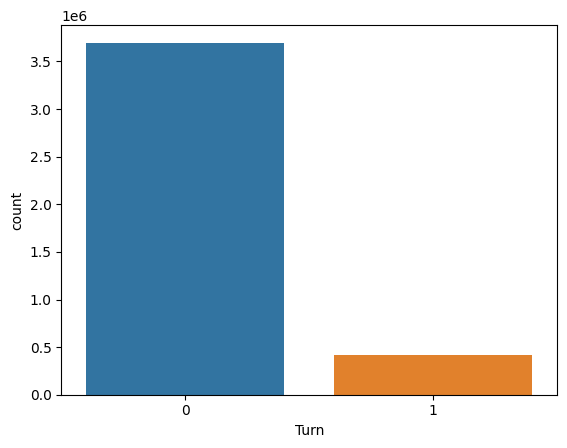

In [18]:
data = defog_model.drop(columns='Subject')
g = sns.countplot(data=  data, x='Turn')

AccV
AccML
AccAP
StartHesitation
Turn
Walking
Visit
Medication


Text(0.5, 0.98, 'Density plots and barplots of variables.png')

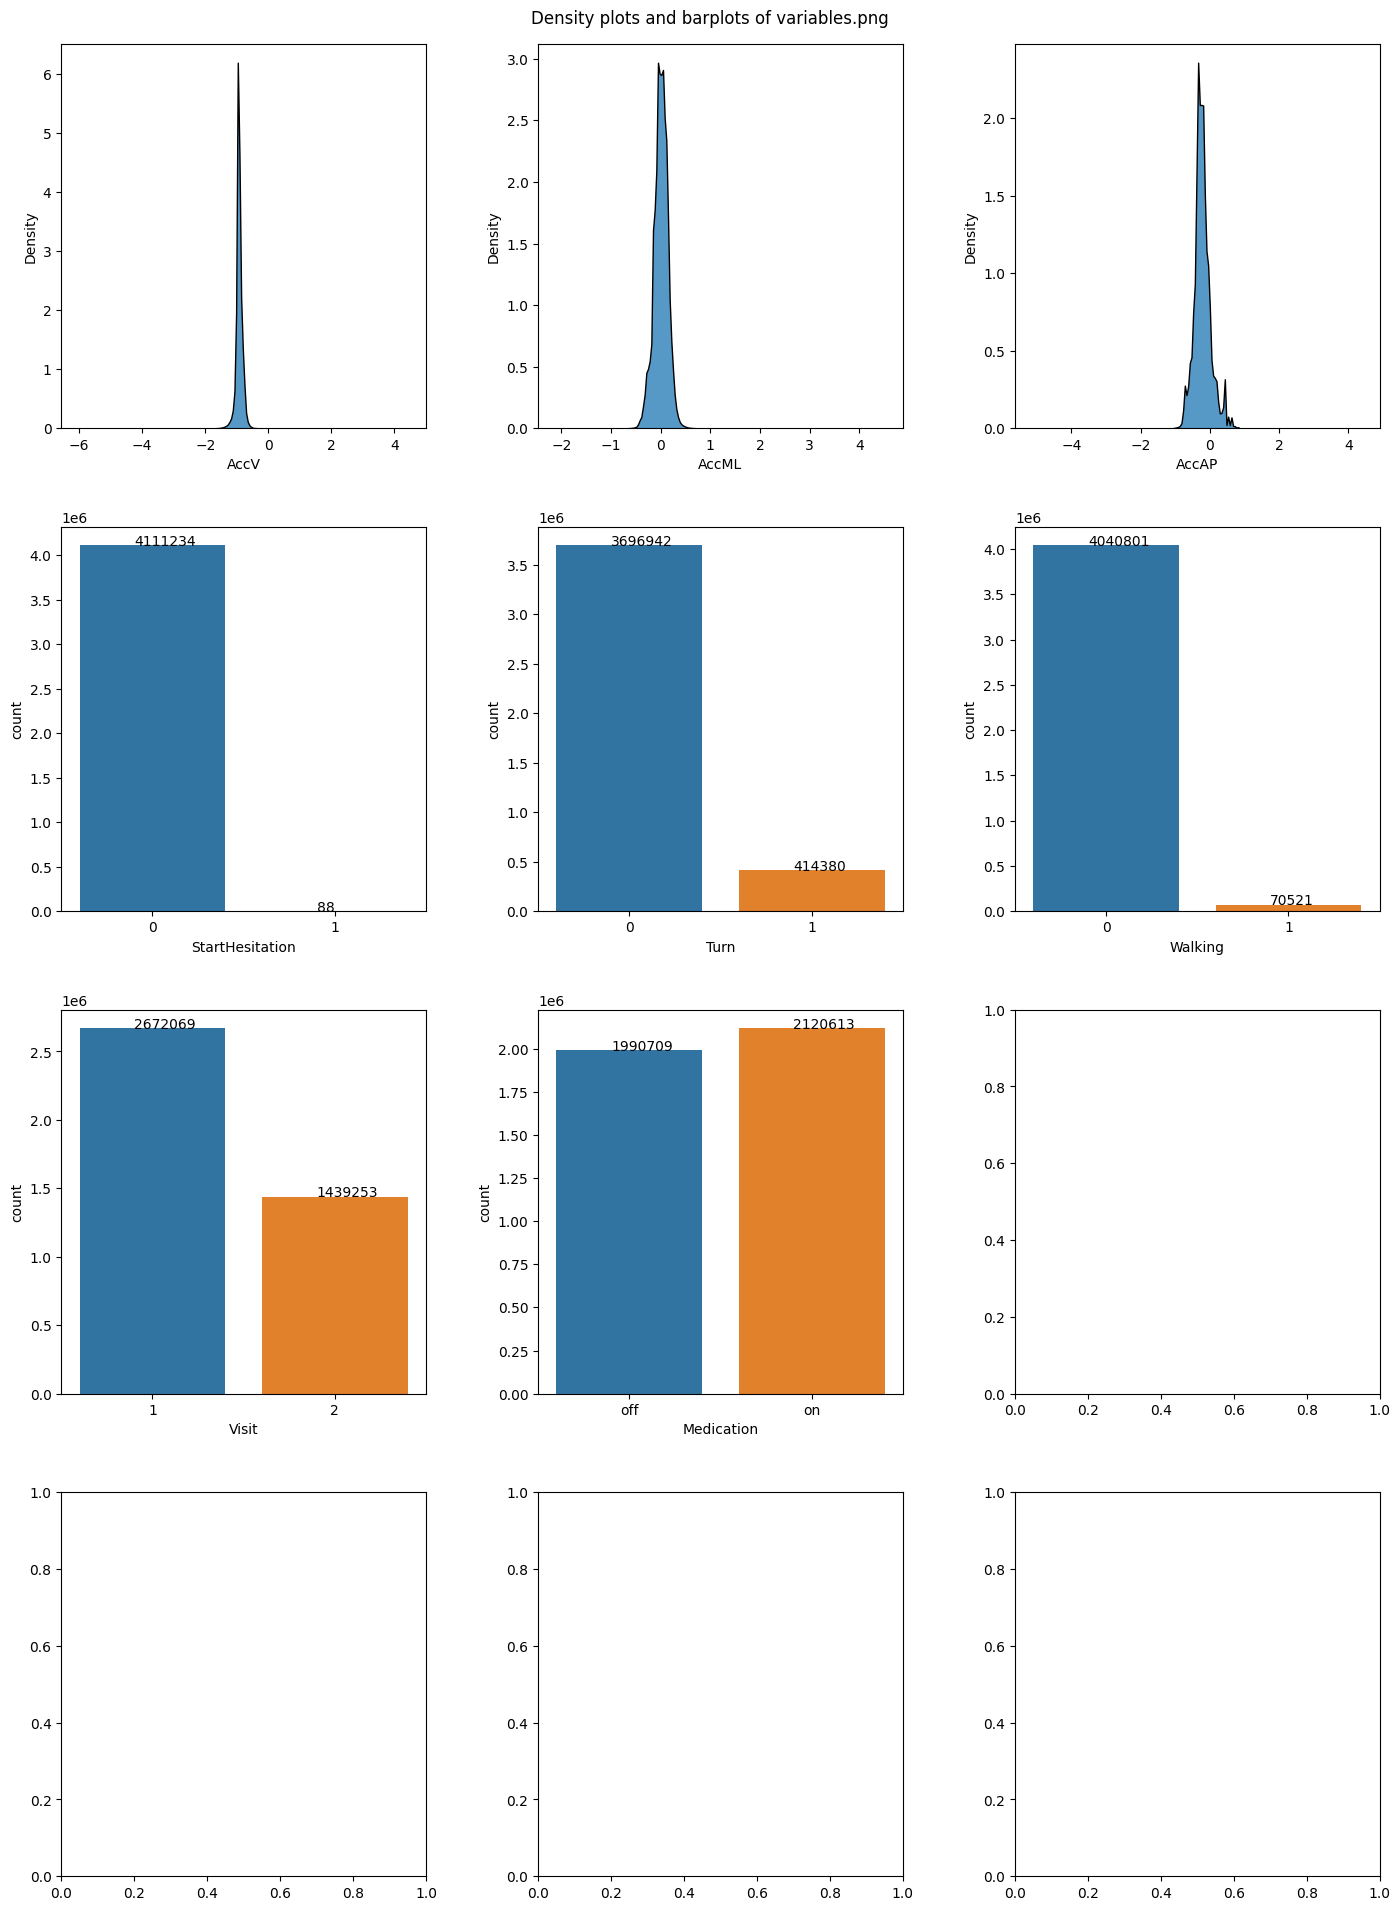

In [22]:
data = defog_model.drop(columns=['Subject','Time'])
y = None
N_features = 10
N_col = 3
if N_features%N_col == 0:
    n_rows = np.int64(N_features/N_col)
else:
    n_rows = np.int64(N_features/N_col) + 1

# plot recursivly according to the type of variables
fig, ax = plt.subplots(nrows=n_rows, ncols=N_col, figsize = (15,20))
fig.tight_layout(pad=5.0)
ind_row = 0
ind_col = 0
for i in data.columns:
    print(i)
    if N_col == ind_col:
        ind_col = 0 
        ind_row += 1 
    if i in data.select_dtypes('category').columns.tolist():
        g = sns.countplot(data=  data, x=str(i), ax=ax[ind_row][ind_col], hue=y)
        #g.set(ylim=(0, 150))
        for p in ax[ind_row][ind_col].patches:
            ax[ind_row][ind_col].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10))
        ind_col += 1  
    elif i in data.select_dtypes(exclude='category').columns.tolist():
        g = sns.kdeplot(data =  data, x=str(i), hue=y, ax=ax[ind_row][ind_col], multiple="stack")
        ind_col +=1


title = "Density plots and barplots of variables.png"
plt.suptitle(str(title))

#### Basic prediction multilabel

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [56]:
data2 = tdsc_[:]
data2

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.533939,0.566322,-1.413525,0,0,0
1,1,-9.536140,0.564137,-1.440621,0,0,0
2,2,-9.529345,0.561765,-1.429332,0,0,0
3,3,-9.531239,0.564227,-1.415490,0,0,0
4,4,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...
7062667,4220,-9.403467,0.089003,-3.220304,0,0,0
7062668,4221,-9.404246,0.090531,-3.216584,0,0,0
7062669,4222,-9.405770,0.084380,-3.224039,0,0,0
7062670,4223,-9.403579,0.084236,-3.236686,0,0,0


In [57]:
X1, y1 = data2[['Time','AccV','AccML','AccAP']], data2[['StartHesitation','Turn','Walking']]
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1 , y1, test_size=0.33 , random_state=40)
ytrain1 = ytrain1.astype('int')
ytrain1 = ytrain1.reset_index()

In [60]:
rf1 = DecisionTreeClassifier(random_state=42)
rf1.fit(Xtrain1, ytrain1)
ypred1 = rf1.predict(Xtest1)

In [27]:
data = defog_model.drop(columns=['Subject'])

In [28]:
X, y = data[['Time','AccV','AccML','AccAP']], data[['StartHesitation','Turn','Walking']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X , y, test_size=0.33 , random_state=40)

In [39]:
ytrain = ytrain.astype('int')

In [40]:
rf = DecisionTreeClassifier()
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [44]:
ypred = pd.DataFrame(ypred)
ypred.columns = ['StartHesitation','Turn','Walking']
ypred

,StartHesitation,Turn,Walking
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1356732,0,0,0
1356733,0,0,0
1356734,0,0,0
1356735,0,1,0


In [50]:
ytest = ytest.reset_index()

In [54]:
sum(ytest['StartHesitation'] != ypred['StartHesitation']) / len(ytest)
sum(ytest['Turn'] != ypred['Turn']) / len(ytest)
sum(ytest['Walking'] != ypred['Walking']) / len(ytest)

0.008110636033365346

In [106]:
tdsc.drop(columns='Id', inplace=True)
tdsc

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Id_,Subject,Visit,Test,Medication
0,0,-9.533939,0.566322,-1.413525,0,0,0,003f117e14,13abfd,3,2,on
1,1,-9.536140,0.564137,-1.440621,0,0,0,003f117e14,13abfd,3,2,on
2,2,-9.529345,0.561765,-1.429332,0,0,0,003f117e14,13abfd,3,2,on
3,3,-9.531239,0.564227,-1.415490,0,0,0,003f117e14,13abfd,3,2,on
4,4,-9.540825,0.561854,-1.429471,0,0,0,003f117e14,13abfd,3,2,on
...,...,...,...,...,...,...,...,...,...,...,...,...
7062667,4220,-9.403467,0.089003,-3.220304,0,0,0,ffda8fadfd,bae0ce,20,1,off
7062668,4221,-9.404246,0.090531,-3.216584,0,0,0,ffda8fadfd,bae0ce,20,1,off
7062669,4222,-9.405770,0.084380,-3.224039,0,0,0,ffda8fadfd,bae0ce,20,1,off
7062670,4223,-9.403579,0.084236,-3.236686,0,0,0,ffda8fadfd,bae0ce,20,1,off


The first data is **subject** that contains metadata for each subject in the study with 8 variables with 173 patients :
- Subject the id of the patient
- Visit : number of visit for assement
- Age and Sex : the age and the sex of the patients 
- YearsSinceDx : Years since parkinson's diagnoisis
- UPDRSIIIOn/UPDRSIIIOff Unified Parkinson's Disease Rating Scale score during on/off medication respectively.
- NFOGQ Self-report FoG questionnaire score

In [21]:
defog_metadata

,Id,Subject,Visit,Medication
0,02ab235146,ab54e1,2,on
1,02ea782681,bf608b,2,on
2,06414383cf,c0b71e,2,off
3,092b4c1819,b6a627,1,off
4,0a900ed8a2,b7bd52,2,on
...,...,...,...,...
132,f3a921edee,ce8b0b,1,off
133,f40e8c6ebe,d9529b,1,off
134,f8ddbdd98d,fc1e1b,1,on
135,f9efef91fb,fe5d84,2,off


In [22]:
defog_train_1

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,1,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,2,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,3,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,4,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
162902,162902,-1.007283,0.234375,-0.375000,0,0,0,False,False
162903,162903,-1.000000,0.234375,-0.369159,0,0,0,False,False
162904,162904,-0.994626,0.234375,-0.351954,0,0,0,False,False
162905,162905,-0.977308,0.234375,-0.336683,0,0,0,False,False


In [4]:
subject.head()

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20


## Data subject descriptive analysis
### Missing values 

In [5]:
descriptive = Descriptive_analysis()
descriptive.missing_values(X = subject)

,Variables,Nans
0,Visit,62
1,UPDRSIII_Off,41
2,UPDRSIII_On,1


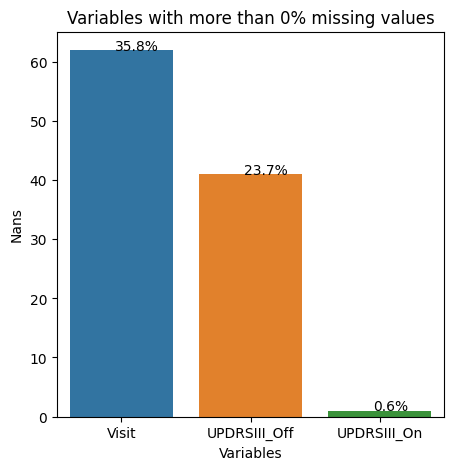

In [6]:
descriptive.plot_missing_values(X = subject, threshold=0, fig_size=[5,5])

There is no variable that have more than 50% of missing values .
How to deal with the missing values for visit ? 

In [9]:
subject[['Visit', 'Sex']] = subject[['Visit', 'Sex']].astype('category')
type_of_vars(subject)

,Types variables
Subject,object
Visit,category
Age,int64
Sex,category
YearsSinceDx,float64
UPDRSIII_On,float64
UPDRSIII_Off,float64
NFOGQ,int64


In [10]:
effectif_int(subject)

,mean,std,min,25%,50%,75%,max
Age,67.763006,7.972075,28.00,62.0,68.0,73.00,94.0
YearsSinceDx,10.383931,6.289191,0.42,6.0,9.0,15.00,30.0
UPDRSIII_On,34.273256,12.732552,5.00,25.0,35.0,42.25,79.0
UPDRSIII_Off,42.878788,12.998550,15.00,33.0,43.0,49.25,91.0
NFOGQ,17.121387,7.575377,0.00,15.0,19.0,22.00,29.0


the mean of age for thoses patients is around 68 years old, and the average of years of disease is 10 years. We can see that the mean of the  Unified Parkinson's Disease Rating Scale score on medication is lower than off medication (34 vs 43)

### Graphics 

Text(0.5, 0.98, 'Density plots and barplots of variables.png')

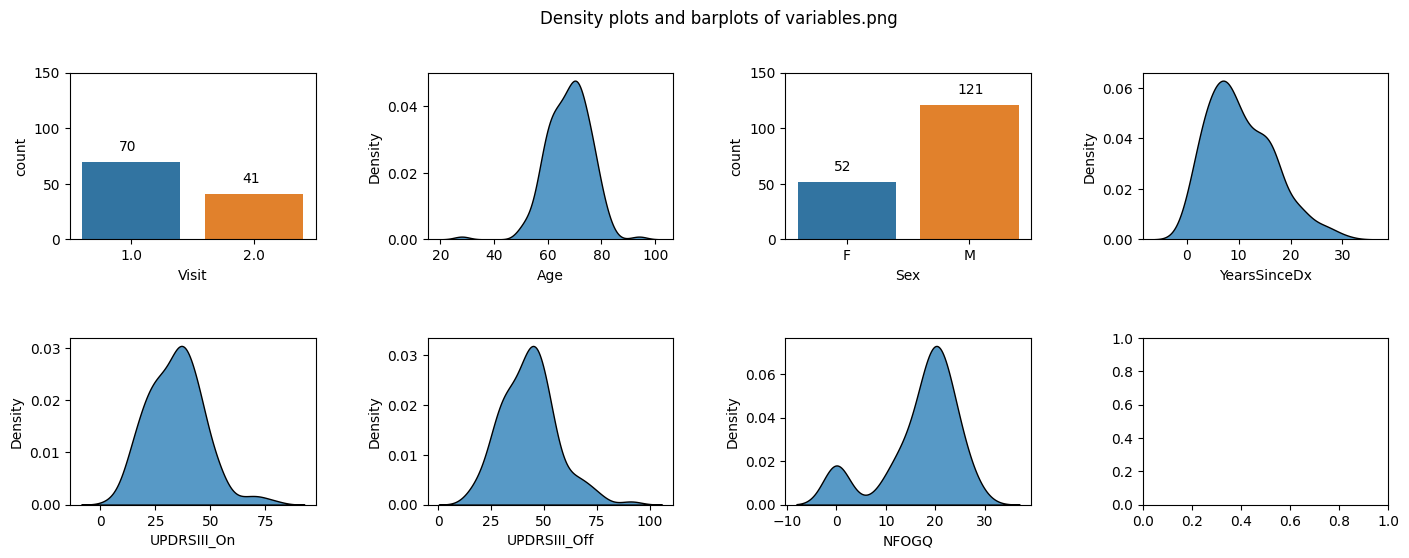

In [20]:
c

In [20]:
defog_train_1

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,1,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,2,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,3,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,4,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
162902,162902,-1.007283,0.234375,-0.375000,0,0,0,False,False
162903,162903,-1.000000,0.234375,-0.369159,0,0,0,False,False
162904,162904,-0.994626,0.234375,-0.351954,0,0,0,False,False
162905,162905,-0.977308,0.234375,-0.336683,0,0,0,False,False


In [17]:
daily_metadata

,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,3d8b73,1,10:19
1,07a96f89ec,a15b56,1,07:30
2,0d1bc672a8,21e523,2,08:30
3,0e333c9833,b068a2,1,11:30
4,164adaed7b,ffa798,1,13:00
...,...,...,...,...
60,e658b0aa3d,b7bd52,1,08:00
61,ed0a487f20,268a2e,1,12:30
62,ef1db3ca64,473568,1,08:00
63,f16c5cda55,b6a627,1,08:30


In [15]:
defog_train_1

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,1,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,2,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,3,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,4,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
162902,162902,-1.007283,0.234375,-0.375000,0,0,0,False,False
162903,162903,-1.000000,0.234375,-0.369159,0,0,0,False,False
162904,162904,-0.994626,0.234375,-0.351954,0,0,0,False,False
162905,162905,-0.977308,0.234375,-0.336683,0,0,0,False,False
